# Xenium registration

In [306]:
# Jean's attempt to make minimal viable example
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tools

In [307]:
# Single cell data 1
# read in data
fname = '/Users/jeanfan/Desktop/STalign/xenium_data/Xenium_FFPE_Human_Breast_Cancer_Rep1_cells.csv.gz'
df1 = pd.read_csv(fname)
df1.head()

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
0,1,377.663005,843.541888,154,0,0,154,110.361875,45.562656
1,2,382.078658,858.944818,64,0,0,64,87.919219,24.248906
2,3,319.839529,869.196542,57,0,0,57,52.561875,23.526406
3,4,259.304707,851.797949,120,0,0,120,75.230312,35.176719
4,5,370.576291,865.193024,120,0,0,120,180.218594,34.499375


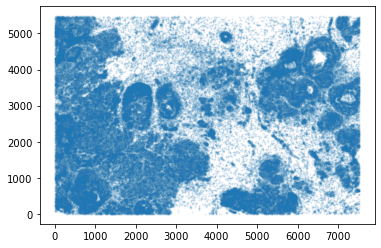

In [308]:
# get cell centroid coordinates
xI = np.array(df1['x_centroid'])
yI = np.array(df1['y_centroid'])

# plot
fig,ax = plt.subplots()
ax.scatter(xI,yI,s=1,alpha=0.1)

0 of 167782
10000 of 167782
20000 of 167782
30000 of 167782
40000 of 167782
50000 of 167782
60000 of 167782
70000 of 167782
80000 of 167782
90000 of 167782
100000 of 167782
110000 of 167782
120000 of 167782
130000 of 167782
140000 of 167782
150000 of 167782
160000 of 167782
167781 of 167782


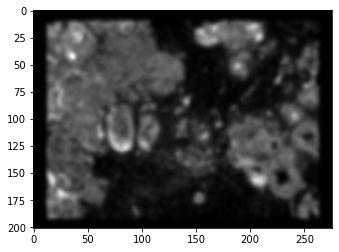

In [309]:
# rasterize at 30um resolution (assuming positions are in um units) and plot
XI,YI,I,fig = tools.rasterize(xI,yI,dx=30)
ax = fig.axes[0]

0 of 118752
10000 of 118752
20000 of 118752
30000 of 118752
40000 of 118752
50000 of 118752
60000 of 118752
70000 of 118752
80000 of 118752
90000 of 118752
100000 of 118752
110000 of 118752
118751 of 118752


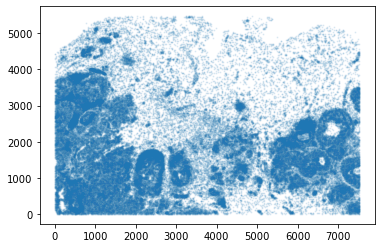

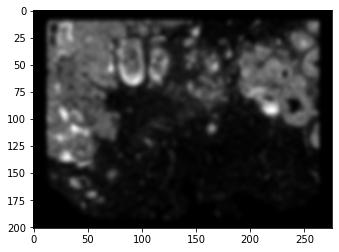

In [310]:
# Single cell data 2
# read in data
fname = '/Users/jeanfan/Desktop/STalign/xenium_data/cells.csv.gz'
df2 = pd.read_csv(fname)
df2.head()

# get cell centroids
xJ = np.array(df2['x_centroid'])
yJ = np.array(df2['y_centroid'])

# plot
fig,ax = plt.subplots()
ax.scatter(xJ,yJ,s=1,alpha=0.1)

# rasterize and plot
XJ,YJ,J,fig = tools.rasterize(xJ,yJ,dx=30)
ax = fig.axes[0]

In [311]:
# write out npz files for spot picker
np.savez('sample1', x=XI,y=YI,I=I)
np.savez('sample2', x=XJ,y=YJ,I=J)
# outputs sample1.npz and sample2.npz

In [312]:
# now can use 
# python curve_annotator.py sample1.npz
# python curve_annotator.py sample2.npz

# copy output
# pointsI = {'0': [(2065.0390375683187, 3096.538441761356)], '1': [(6505.52290853606, 4365.248119180711)], '2': [(4226.85355369735, 4932.828764342001)]}
# pointsJ = {'0': [(2365.8569852416354, 1218.8582693193312)], '1': [(6839.7279529835705, 2387.4066564161058)], '2': [(4552.711823951313, 3046.801817706428)]}

# or just read from file
pointsIlist = np.load('sample1_curves.npy', allow_pickle=True).tolist()
print(pointsI)
pointsJlist = np.load('sample2_curves.npy', allow_pickle=True).tolist()
print(pointsJ)

[[3096.53844176 2065.03903757]
 [4365.24811918 6505.52290854]
 [4932.82876434 4226.8535537 ]]
[[1218.85826932 2365.85698524]
 [2387.40665642 6839.72795298]
 [3046.80181771 4552.71182395]]


In [313]:
# convert to array
pointsI = []
pointsJ = []

# Jean's note: a bit odd to me that the points are stored as y,x
## instead of x,y but all downstream code uses this orientation
for i in pointsIlist.keys():
    pointsI.append([pointsIlist[i][0][1], pointsIlist[i][0][0]])
for i in pointsJlist.keys():
    pointsJ.append([pointsJlist[i][0][1], pointsJlist[i][0][0]])
    
pointsI = np.array(pointsI)
pointsJ = np.array(pointsJ)

In [314]:
print(pointsI)
print(pointsJ)

[[3096.53844176 2065.03903757]
 [4365.24811918 6505.52290854]
 [4932.82876434 4226.8535537 ]]
[[1218.85826932 2365.85698524]
 [2387.40665642 6839.72795298]
 [3046.80181771 4552.71182395]]


In [315]:
# double check some dimensions of things
print(I.shape)
print(I.transpose(1,2,0).squeeze().shape)
print(XI.shape)
print(YI.shape)
print(J.shape)
print(J.transpose(1,2,0).squeeze().shape)
print(XJ.shape)
print(YJ.shape)

(1, 201, 276)
(201, 276)
(276,)
(201,)
(1, 201, 276)
(201, 276)
(276,)
(201,)


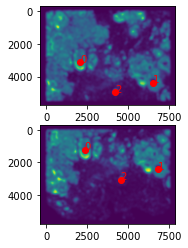

In [316]:
# get extent of images
extentI = tools.extent_from_x((YI,XI))
extentJ = tools.extent_from_x((YJ,XJ))

# plot rasterized images
fig,ax = plt.subplots(2,1)
ax[0].imshow((I.transpose(1,2,0).squeeze()), extent=extentI) # just want 201x276 matrix
ax[1].imshow((J.transpose(1,2,0).squeeze()), extent=extentJ) # just want 201x276 matrix
# with points
ax[0].scatter(pointsI[:,1], pointsI[:,0], c='red')
ax[1].scatter(pointsJ[:,1], pointsJ[:,0], c='red')
for i in range(pointsI.shape[0]):
    ax[0].text(pointsI[i,1],pointsI[i,0],f'{i}', c='red')
    ax[1].text(pointsJ[i,1],pointsJ[i,0],f'{i}', c='red')

In [317]:
# compute initial affine transformation from points
L,T = tools.L_T_from_points(pointsI, pointsJ)

In [318]:
# run LDDMM
# running this on my desktop so cpu device
device = 'cpu' 

# keep all other parameters default
params = {'L':L,'T':T,
          'niter':100,
          'pointsI':pointsI,
          'pointsJ':pointsJ,
          'device':device,
          'sigmaM':1.5,
          'sigmaB':1.0,
          'sigmaA':1.5,
          'epV': 100
          }

# to discuss: following command gives errors because BW image
# TypeError: Invalid shape (201, 276, 1) for image data
# A,v,xv = tools.LDDMM([YI,XI],I,[YJ,XJ],J,**params)

In [319]:
Ifoo = np.vstack((I, I, I))
Ifoo.shape
Jfoo = np.vstack((J, J, J))
Jfoo.shape

(3, 201, 276)

/Users/jeanfan/Desktop/STalign/tools.py:1266: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axE[2].set_yscale('log')


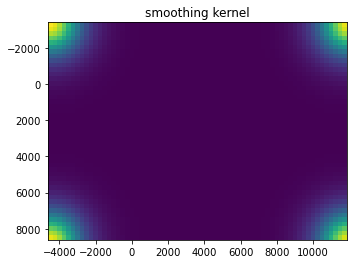

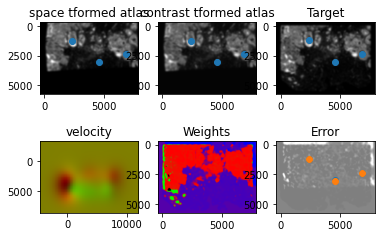

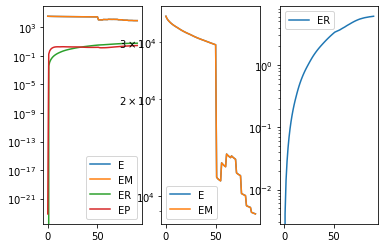

In [320]:
# Jean's hack
A,v,xv = tools.LDDMM([YI,XI],Ifoo,[YJ,XJ],Jfoo,**params)

In [321]:
# apply transform
phii = tools.build_transform(xv,v,A,XJ=[YJ,XJ],direction='b')
phiI = tools.transform_image_atlas_to_target(xv,v,A,[YI,XI],Ifoo,[YJ,XJ])
phipointsI = tools.transform_points_atlas_to_target(xv,v,A,pointsI)

/Users/jeanfan/Desktop/STalign/tools.py:1602: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(A)
/Users/jeanfan/Desktop/STalign/tools.py:1603: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = torch.tensor(v)
/Users/jeanfan/Desktop/STalign/tools.py:1615: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  XJ = torch.tensor(XJ)


In [322]:
# note outputs are tensors
print(type(phii))
print(type(phiI))

# need torch to handle
import torch

<class 'torch.Tensor'>
<class 'torch.Tensor'>


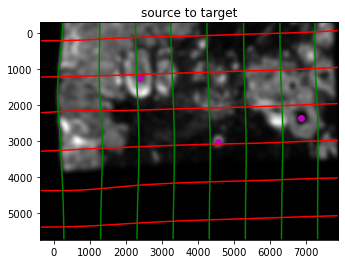

In [323]:
# plot with grids
fig,ax = plt.subplots()

levels = np.arange(-100000,100000,1000)

ax.contour(XJ,YJ,phii[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XJ,YJ,phii[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('source to target')

ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ)
ax.scatter(phipointsI[:,1].detach(),phipointsI[:,0].detach(),c="m")

In [324]:
# transform is invertible
phi = tools.build_transform(xv,v,A,XJ=[YI,XI],direction='f')
phiiJ = tools.transform_image_target_to_atlas(xv,v,A,[YJ,XJ],Jfoo,[YI,XI])
phiipointsJ = tools.transform_points_target_to_atlas(xv,v,A,pointsJ)

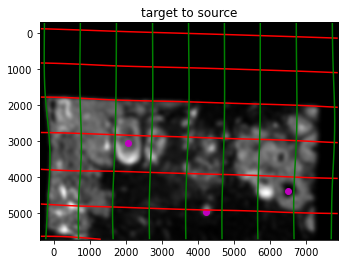

In [325]:
# plot with grids
fig,ax = plt.subplots()

levels = np.arange(-100000,100000,1000)

ax.contour(XI,YI,phi[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XI,YI,phi[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('target to source')

ax.imshow(phiiJ.permute(1,2,0)/torch.max(phiiJ),extent=extentI)
ax.scatter(phiipointsJ[:,1].detach(),phiipointsJ[:,0].detach(),c="m")

In [326]:
# apply transform to original points
tpointsI = np.stack([xI, yI]) # just original points
# Jean's point of confusion: why is the numpy array inputted in the form [y,x] and not [x,y]?
tpointsJ = tools.transform_points_target_to_atlas(xv,v,A, np.stack([yJ, xJ], 1))

In [327]:
print(tpointsI.shape)
print(tpointsJ.shape)

(2, 167782)
torch.Size([118752, 2])


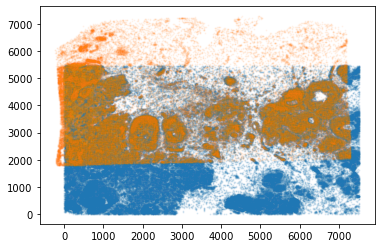

In [328]:
# plot results
fig,ax = plt.subplots()
ax.scatter(tpointsI[0,:],tpointsI[1,:],s=1,alpha=0.1) 
ax.scatter(tpointsJ[:,1],tpointsJ[:,0],s=1,alpha=0.05) # also needs to plot as y,x not x,y

In [329]:
# save results by appending
print(df2.shape)
print(tpointsJ.shape)
print(tpointsJ.numpy().shape)

results = np.hstack((df2, tpointsJ.numpy()))
print(results.shape)

(118752, 9)
torch.Size([118752, 2])
(118752, 2)
(118752, 11)


In [330]:
np.savetxt('sample2_STalign.csv', results, delimiter=',')

In [331]:
# note results are in y,x coordinates